In [57]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split,cross_val_score
import graphviz
from sklearn import tree


In [58]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df=pd.read_csv('https://raw.githubusercontent.com/Sabya-J/Econ211_decisiontree_sj288/main/QualityOfLife2020.csv')
df.head()

,Rank,City,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,1,"Canberra, Australia",213.79,117.59,80.68,81.95,75.16,5.08,23.70,14.23,82.72
1,2,"Raleigh, NC, United States",210.54,145.30,68.11,75.66,69.80,2.73,32.41,20.90,83.88
2,3,"Adelaide, Australia",210.18,116.12,71.31,80.19,68.40,4.05,23.58,19.46,94.96
3,4,"Wellington, New Zealand",205.06,106.71,71.39,74.84,70.47,6.06,27.68,13.30,97.68
4,5,"Columbus, OH, United States",200.44,142.17,58.21,73.46,70.50,1.89,25.98,25.13,71.29


In [59]:
df['Return']=pd.qcut(df['Quality of Life Index'],2, labels=np.arange(0,2,1) )


In [60]:
print(df.shape)
X = df.drop(columns = ['City', 'Quality of Life Index', 'Rank'])
list(X.columns)

(227, 12)


['Purchasing Power Index',
 'Safety Index',
 'Health Care Index',
 'Cost of Living Index',
 'Property Price to Income Ratio',
 'Traffic Commute Time Index',
 'Pollution Index',
 'Climate Index',
 'Return']

In [61]:
X.describe()

,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,75.122775,57.577841,67.019868,57.368282,11.738018,36.601057,50.834846,77.477533
std,34.528722,15.291995,9.370496,19.806250,12.001254,9.016327,20.999719,17.359044
min,2.360000,15.100000,39.280000,22.950000,1.700000,16.360000,12.650000,14.280000
25%,44.260000,47.930000,61.085000,39.685000,5.910000,30.100000,34.280000,67.700000
50%,73.650000,58.210000,68.150000,61.850000,10.150000,35.290000,49.500000,81.850000
75%,101.090000,69.815000,73.790000,72.330000,13.940000,41.505000,66.860000,89.995000
max,155.300000,88.670000,86.580000,128.290000,150.550000,66.380000,95.650000,99.930000


In [62]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled,columns = X.columns)
X_scaled_df.head()

,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Return
0,1.232628,1.514074,1.596834,0.900273,-0.556003,-1.434017,-1.746963,0.302669,1.004415
1,2.036922,0.690259,0.924095,0.629054,-0.752248,-0.465857,-1.428638,0.369641,1.004415
2,1.189961,0.899981,1.408595,0.558213,-0.642017,-1.447356,-1.497362,1.009336,1.004415
3,0.916832,0.905224,0.836393,0.662956,-0.474164,-0.991620,-1.791348,1.166373,1.004415
4,1.946072,0.041431,0.688796,0.664474,-0.822396,-1.180584,-1.226762,-0.357232,1.004415


In [63]:
X_scaled_df.describe()

,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Return
count,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02
mean,3.638793e-16,5.516879e-16,1.684409e-15,-5.477752e-16,-6.260288e-17,6.311642e-16,-2.817130e-16,-2.963855e-16,-1.907432e-16
std,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00
min,-2.111969e+00,-2.783922e+00,-2.966884e+00,-1.741589e+00,-8.382625e-01,-2.249895e+00,-1.822369e+00,-3.648657e+00,-9.956044e-01
25%,-8.958044e-01,-6.323022e-01,-6.347565e-01,-8.947863e-01,-4.866906e-01,-7.226251e-01,-7.900787e-01,-5.644977e-01,-9.956044e-01
50%,-4.274789e-02,4.143054e-02,1.208719e-01,2.267780e-01,-1.326134e-01,-1.457306e-01,-6.370541e-02,2.524407e-01,-9.956044e-01
75%,7.537091e-01,8.020014e-01,7.240912e-01,7.570733e-01,1.838848e-01,5.450978e-01,7.647992e-01,7.226855e-01,1.004415e+00
max,2.327176e+00,2.037724e+00,2.092030e+00,3.588688e+00,1.159202e+01,3.310079e+00,2.138800e+00,1.296274e+00,1.004415e+00


In [64]:
pca = PCA(n_components=4)
pca.fit(X_scaled)
pd.DataFrame(pca.components_,columns = X.columns,index = ['PC_1','PC_2','PC_3','PC_4']).T

,PC_1,PC_2,PC_3,PC_4
Purchasing Power Index,-0.425719,-0.170496,-0.293111,0.083037
Safety Index,-0.190560,0.585505,0.402965,0.262862
Health Care Index,-0.338980,-0.124833,0.125409,0.401112
Cost of Living Index,-0.388432,-0.263540,-0.036340,0.242295
Property Price to Income Ratio,0.258482,-0.042835,0.559127,0.453576
Traffic Commute Time Index,0.274683,-0.413359,-0.240772,0.586902
Pollution Index,0.429541,0.003022,-0.149591,0.061790
Climate Index,0.002561,-0.606985,0.578927,-0.386923
Return,-0.435762,-0.044011,0.080811,-0.026443


In [65]:
pca_components = pca.transform(X_scaled)
print(pca_components.shape)
pca_df = pd.DataFrame(pca_components,columns = ['PC_1','PC_2','PC_3','PC_4'])
pca_df.head()

(227, 4)


,PC_1,PC_2,PC_3,PC_4
0,-3.429183,0.623124,0.968477,0.013557
1,-2.929088,-0.272376,-0.025428,0.001194
2,-3.014194,-0.034495,1.049239,-0.614637
3,-2.702944,-0.232812,1.174856,-0.575398
4,-2.830371,0.123515,-0.609190,-0.420275


[4.06018664 1.27641692 1.02808047 0.74535297] [0.44914448 0.14119933 0.11372794 0.08245216]


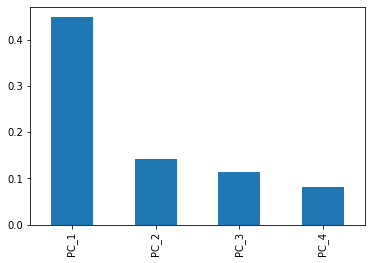

In [66]:
print(pca.explained_variance_, pca.explained_variance_ratio_)
pd.Series(pca.explained_variance_ratio_,index = ['PC_1','PC_2','PC_3','PC_4']).plot.bar()

In [67]:
pca_df['Target'] = df['Quality of Life Index']
pca_df.head()

,PC_1,PC_2,PC_3,PC_4,Target
0,-3.429183,0.623124,0.968477,0.013557,213.79
1,-2.929088,-0.272376,-0.025428,0.001194,210.54
2,-3.014194,-0.034495,1.049239,-0.614637,210.18
3,-2.702944,-0.232812,1.174856,-0.575398,205.06
4,-2.830371,0.123515,-0.609190,-0.420275,200.44


In [68]:
X_train,X_test,y_train,y_test = train_test_split(pca_df.drop('Target',axis = 1),pca_df['Target'],test_size = 0.5,random_state = 0)

In [69]:
reg = LinearRegression()
reg.fit(X_train,y_train)
print('Training score ',reg.score(X_train,y_train))
print('Test score ',reg.score(X_test,y_test))

Training score  0.9661006473054978
Test score  0.9313736020561363


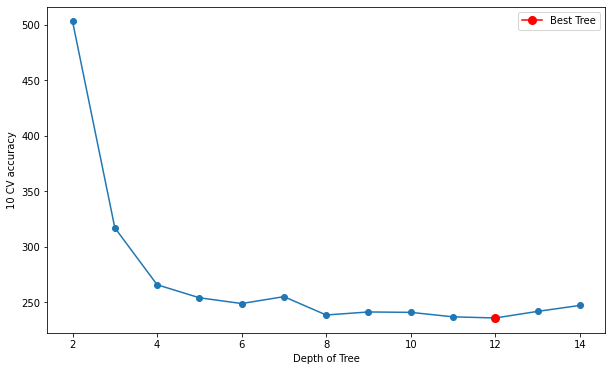

In [70]:
scores_dict = {}
for max_depth in np.arange(2,15):
    regt = DecisionTreeRegressor(max_depth = max_depth)
    scores_dict[max_depth] = -np.mean(cross_val_score(regt,pca_df.drop('Target',axis = 1),pca_df['Target'],
                                                      scoring = 'neg_mean_squared_error',cv = 10))

plt.figure(figsize = (10,6))
plt.plot(list(scores_dict.keys()),list(scores_dict.values()),marker ='o')
plt.plot(min(scores_dict, key=scores_dict.get),min(list(scores_dict.values())),marker = 'o',markersize = 8,color = 'r',label = 'Best Tree')
plt.xlabel('Depth of Tree')
plt.ylabel('10 CV accuracy')
plt.legend()

In [71]:
reg_tree = DecisionTreeRegressor(max_depth=min(list(scores_dict.values())))
reg_tree.fit(X_train,y_train)
print("Beta_1 to Beta_p are ", reg.coef_)
print("Beta_0 = ", reg.intercept_)
print('Training score ',reg_tree.score(X_train,y_train))
print('Test score ',reg_tree.score(X_test,y_test))


Beta_1 to Beta_p are  [-18.44260797   0.43400427   0.96214516  -6.21549013]
Beta_0 =  141.44064662329131
Training score  1.0
Test score  0.8456176285836153


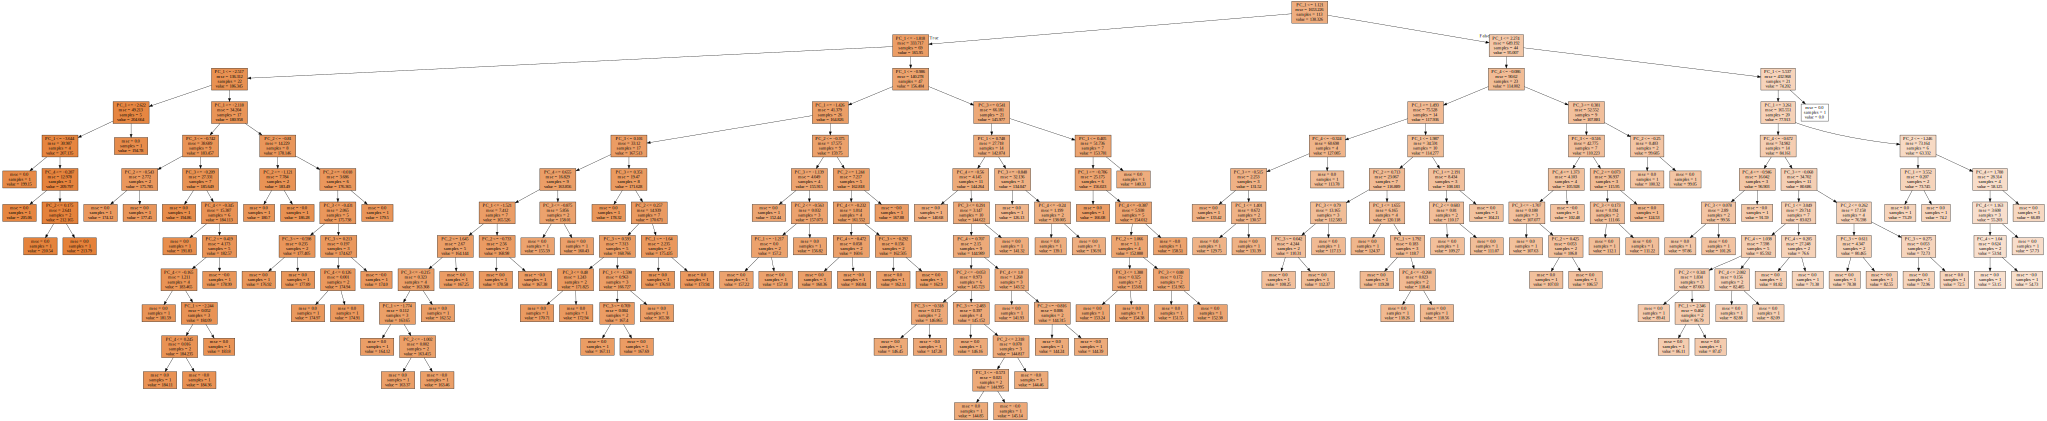

In [72]:
dot_data = tree.export_graphviz(reg_tree, out_file=None, 
                               feature_names=X_train.columns,  
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph